# CH04. 로지스틱 회귀 (logistic regression) (실습)

### [1] 실습 진행 관련 설명
로지스틱 회귀에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

우선 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기 및 특성 스케일링

- (2) (데이터 측면) 데이터에서 훈련데이터와 테스트 데이터로 구분하기

- (3) (모델 측면) sklearn 라이브러리를 이용하여 로지스틱 회귀 모델 불러오기. 또는 직접 함수 구현하기 (로지스틱회귀 모델 정의).

- (4) (학습 과정) sklearn 라이브러리를 이용하여 모델 학습하기. 또는 직접 구현하기 (손실함수 정의 & Sigmoid).

- (5) (성능 평가) 테스트 데이터를 이용하여 학습된 모델에 대한 성능 평가하기. (정확도)

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




**실습 라이브러리 소개**

이번 실습에서도 이전 실습과 마찬가지로 numpy, pandas, matplotlib, sklearn과 같은 라이브러리가 활용된다. pandas는 행과 열로 구성된 2차원 데이터 처리 기능을 제공하는 라이브러리이며, matplotlib는 그래프등을 통해 데이터를 가시화하는 목적으로 사용되는 라이브러리이다. sklearn 라이브러리는 각종 머신러닝 모델이 구현되어 활용 가능한 라이브러리다.

In [ ]:
#Git Hub 저장소에서 실습 관련 자료를 복제(Clone) 해온다.
!git clone https://github.com/Zanal13/logisticregression
#코랩 탭의 파일구조 내에서 위에서 복제한 실습 자료가 있는 폴더로 이동하여 실습을 진행한다.
%cd /content/logisticregression

Cloning into 'logisticregression'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7
Receiving objects: 100% (9/9), 5.79 KiB | 5.79 MiB/s, done.
/content/logisticregression


In [ ]:
'''
로지스틱 회귀(Logistic Regression)
import를 통해 라이브러리 불러온다.
as를 통해서 import로 불러온 라이브러리명을 재지정한다.
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**실습 데이터 소개**

이번 실습  데이터는 "User ID", "Gender", "Age", "EstimatedSalary", "Purchased"으로 구성되어 있다.

그 중 "Age"와 "EstimatedSalary"를 특징벡터(X)로 활용하고,
"Purchased"를 실제값(y)로 활용한다.

**특징 스케일링**

이번 실습에서는 주어진 데이터의 값을 변환하는 과정이 포함되어 있다.

StandardScaler는 "x"라는 값을 "z"라는 값으로 변환하는데 변환 공식은 z=(x-u)/s ("u"는 관측값의 평균, "s"는 관측값의 표준 편차)으로 표현된다.

- 참고로 실습에 사용할 파일을 업로드할 때는 코랩 화면 왼쪽 하단의 폴더 모양 아이콘(마우스 포인터를 대고 있으면 '파일'이라고 표시됨)을 클릭한 후, 클릭 후 표시되는 공간에 실습용 파일(Social_Network_Ads.csv)을 drag&drop하면 됨

In [ ]:
'''
(1) (데이터 측면) 데이터 불러오기 (Importing the datas) 및 스케일링
로지스틱회귀 학습을 위해 'Social_Network_Ads.csv' 파일을 불러온다.
특성 스케일링을 통해 데이터 분포를 정규화 할 수 있다.
정규화를 통해 데이터로부터 도출되는 확률분포의 추정능력이 향상되고, 연산량도 줄어들게 된다.
'''

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

sc = StandardScaler()
X = sc.fit_transform(X)  # 학습데이터 X의 값을 z=(x-u)/s의 공식을 이용하여 변환.

**훈련 데이터와 테스트 데이터**

train_test_split 함수는 학습 데이터를 모델의 학습을 위한 "훈련 데이터"와 학습된 모델의 성능 확인을 위한 "테스트 데이터"로 분할하는 동작을 한다. 훈련 데이터와 테스트 데이터를 구성/분할할 때는 훈련 데이터와 테스트 데이터에 중복되지 않는다.

In [ ]:
'''
(2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기
X(특징벡터)와 y(정답값)을 훈련데이터셋과 테스트데이터셋으로 분할한다.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  # test_size를 통해서 훈련데이터와 테스트데이터의 비율을 설정 가능하다.

In [ ]:
'''
(3) (모델 측면) 로지스틱 회귀 모델 불러오기
sklearn 라이브러리를 통해 구현되어 있는 로지스틱 회귀 모델을 불러온다.
'''
classifier = LogisticRegression()

**fit과 predict**

sklearn 라이브러리는 인터페이스가 표준화가 잘 되어 있어 모델 학습 과정은 fit이라는 함수를 사용하고, 학습된 모델을 이용하여 회귀 값을 예측하는 과정은 predict 함수를 사용한다.

In [ ]:
'''
(4) (학습 과정) 모델 학습 하기
fit을 통해 모델을 학습한다.
fit 함수에는 1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
'''
classifier.fit(X_train, y_train)  # 학습과정에서는 훈련데이터만 사용된다.
w_1 = classifier.coef_
w_0 = classifier.intercept_
print(w_1)
print(w_0)

[[2.20607209 1.17515761]]
[-0.93782458]


**분류의 성능평가지표**

분류 작업을 수행하는 모델의 성능을 평가할 때는 다양한 성능측도를 사용하는데 이번실습에서는 Accuracy를 사용한다.

Accuracy(정확도)는 테스트 데이터에서 모델이 클래스 레이블을 정확하게 예측한 비율을 표시한다.


In [ ]:
'''
(5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
predict를 통해 로지스틱회귀로 얻은 예측값을 추출한다.
'''
y_pred = classifier.predict(X_test)  # 예측단계에서는 테스트데이터만 사용된다.
result = sklearn.metrics.accuracy_score(y_test, y_pred)  # 모델의 신뢰도 (성공의 확률/실패의 확률)을 의미한다.
print(result)

0.91


**결과 시각화**

데이터나 모델의 동작을 가시화하면 직관적으로 특징을 파악하기 쉽다.

matplotlib에는 가시화에 필요한 다양한 그래프들이 포함되어 있어 가시화에 도움이 된다.

배경색과 점의 색상이 틀린 경우 클래스 레이블을 잘못 예측한 경우에 해당한다.

<ipython-input-10-88ea915e61b3>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


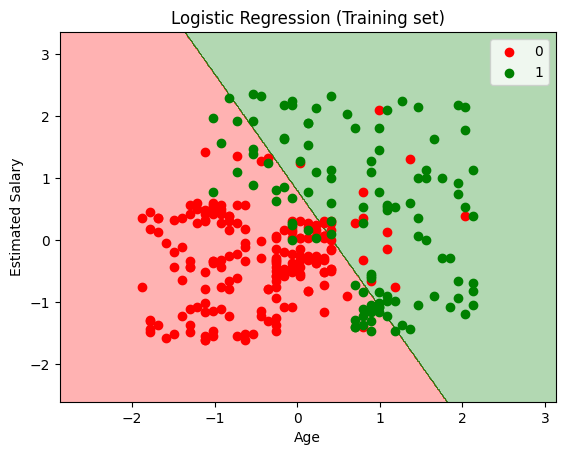

In [ ]:
'''
훈련 데이터셋에 대한 시각화
'''
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-11-c66fef5a6948>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


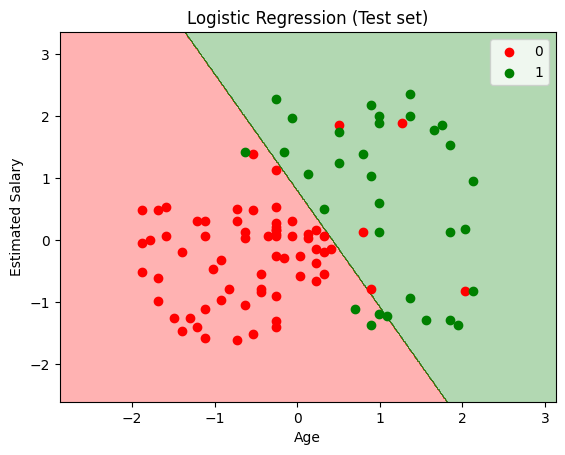

In [ ]:
'''
테스트 데이터셋에 대한 시각화
'''
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## (두번째 실습) 직접구현


In [ ]:
'''
(1) (데이터 측면) 데이터 불러오기 (Importing the datas) 및 스케일링
로지스틱회귀 학습을 위해 'Social_Network_Ads.csv' 파일을 불러온다.
특성 스케일링을 통해 데이터 분포를 정규화 할 수 있다.
정규화를 통해 데이터로부터 도출되는 확률분포의 추정능력이 향상되고, 연산량도 줄어들게 된다.
'''
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

sc = StandardScaler()
X = sc.fit_transform(X)  # 학습데이터 X에 대해서 평균과 분산을 표준정규분포 형태로 바꿔준다.

In [ ]:
'''
(2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기
X(특징벡터)와 y(정답값)을 훈련데이터셋과 테스트데이터셋으로 분할한다.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  # test_size를 통해서 훈련데이터와 테스트데이터의 비율을 설정 가능하다.

In [ ]:
'''
(3) (모델 측면) 로지스틱 회귀 모델 불러오기
로지스틱 회귀를 위해 필요한 함수 및 변수를 선언한다.
'''
w_2 = 1    # 가중치 초기화
w_1 = 1
w_0 = 1
lr = 0.1	 # 학습률(일반적인 경우 0 < lr < 1)

def sigmoid(x):
    return 1.0/(1 + np.exp(-x))  # exp(x)가 지수함수(e^(x))와 동일한 표현이다.

# 강의자료(인공지능입문4장_로지스틱회귀p2.pdf) 16번 슬라이드
def BCE_loss(y, y_hat):  # Binary Cross Entropy loss
    loss = np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
    return -loss

# 강의자료(인공지능입문4장_로지스틱회귀p2.pdf) 17번 슬라이드
def gradient_descent(X, y, y_hat):
    global w_2, w_1, w_0
    w_2 = w_2 - lr * (-X[0]) * (y- y_hat)
    w_1 = w_1 - lr * (-X[1]) * (y- y_hat)
    w_0 = w_0 - lr * (-1) * (y- y_hat)

In [ ]:
'''
(4) (학습 과정) 모델 학습 하기
(3)에서 구현한 함수를 통해 모델을 학습한다.
1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트를 모두 사용한다.
'''
for epoch in range(100):                          # 원하는 만큼 반복횟수를 설정해준다,
	for X, y in zip(X_train, y_train):
		y_hat = sigmoid(X[0]*w_2 + X[1]*w_1 + w_0)    # 모델의 예측값 추출
		loss = BCE_loss(y, y_hat)                     # 손실값 계산
		gradient_descent(X, y, y_hat)                 # 손실값을 통한 경사하강법으로 w1, w0 업데이트
print(w_2, w_1, w_0)

2.553297767027853 1.2181422640218151 -1.1050468053713014


In [ ]:
'''
(5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
sklearn 라이브러리와 동일
'''
def predict(X):
    global w_2, w_1, w_0
    preds = sigmoid(X[:,0]*w_2 + X[:,1]*w_1 + w_0)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]  # 예측결과가 0.5이상이면 1, 그렇지 않으면 0으로 간주
    return np.array(pred_class)

y_hat = predict(X_test)
result = sklearn.metrics.accuracy_score(y_test, y_hat)
print(result)

0.82


<ipython-input-17-4587c087015e>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


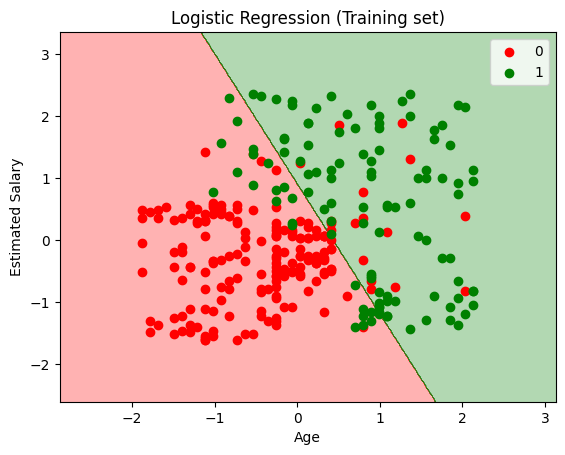

In [ ]:
'''
훈련 데이터셋에 대한 시각화
'''
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-18-f146ae5958f3>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


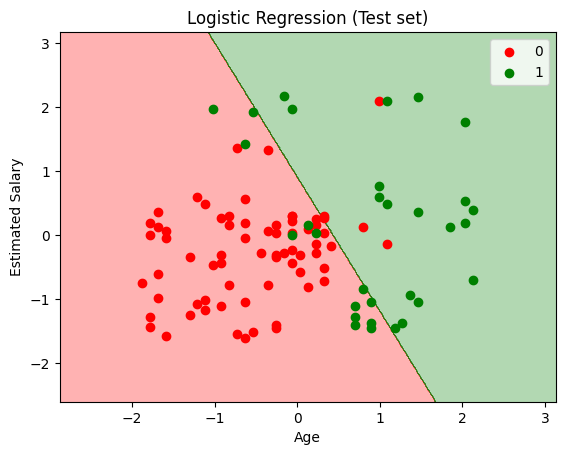

In [ ]:
'''
테스트 데이터셋에 대한 시각화
'''
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()